In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [9]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [10]:
faces.data.shape

(13233, 2914)

In [12]:
faces.images.shape

(13233, 62, 47)

In [13]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [14]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

In [15]:
def plot_faces(faces):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), 
                            subplot_kw={'xticks': [], 'yticks': []},
                gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()

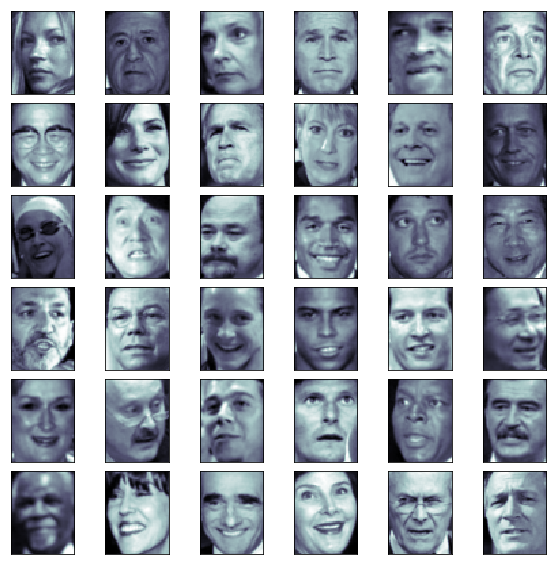

In [16]:
plot_faces(example_faces)

In [17]:
faces.target

array([5360, 3434, 3807, ..., 2175,  373, 2941], dtype=int64)

In [18]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [19]:
faces.target_names.shape

(5749,)

### 特征脸

In [20]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 48.4 s


In [21]:
pca.components_.shape

(2914, 2914)

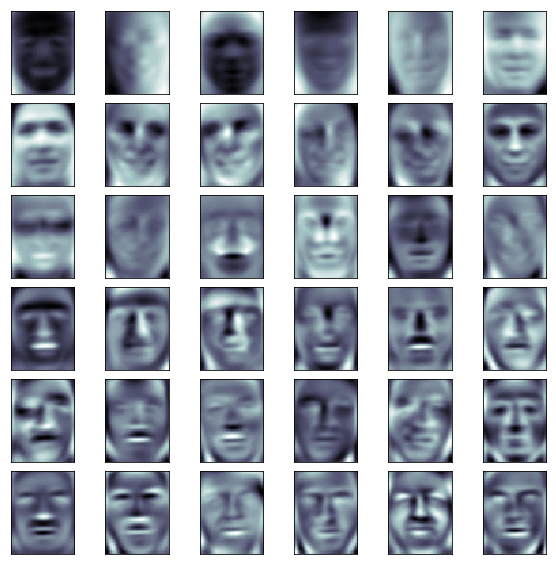

In [23]:
plot_faces(pca.components_[:36, :])

In [25]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [26]:
faces2.data.shape

(1348, 2914)

In [27]:
faces2.target.shape

(1348,)

In [28]:
faces2.target_names.shape

(8,)

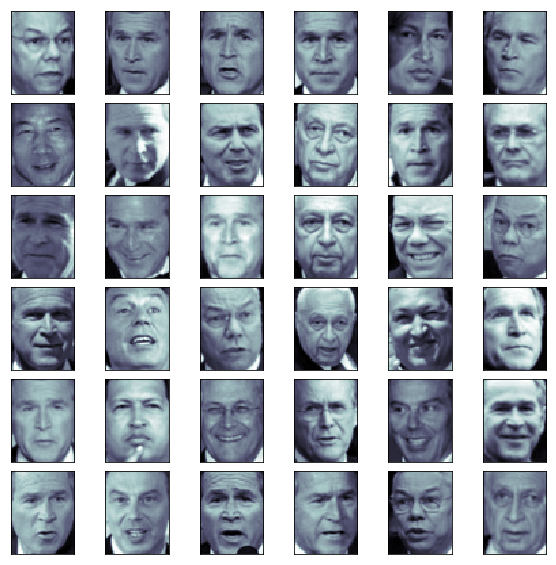

In [29]:
plot_faces(faces2.data[:60, :])

In [30]:
%%time
pca2 = PCA(svd_solver='randomized')
pca2.fit(faces2.data[:60, :])

Wall time: 71.6 ms


In [31]:
pca2.components_.shape

(60, 2914)

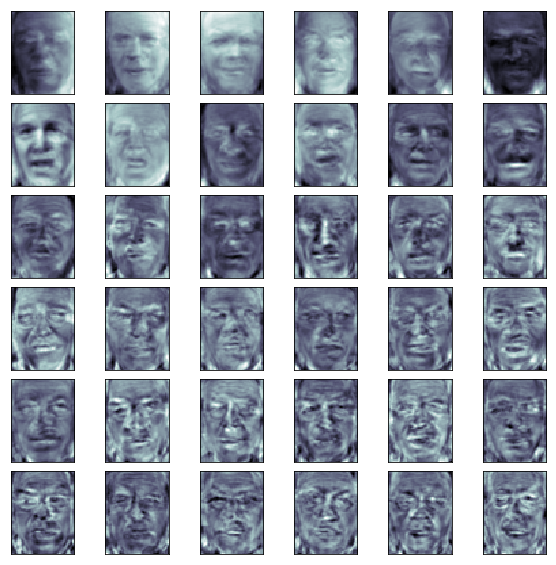

In [32]:
plot_faces(pca2.components_)